In [1]:
import numpy as np
import xarray as xr
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import itertools as it

sns.set_style('whitegrid', {'xtick.major.size': 5,
                            'xtick.labelsize': 'large',
                            'ytick.major.size': 5,
                            'ytick.labelsize': 'large',
                            'axes.edgecolor': 'k',
                            'font.weight': 'bold',
                            'axes.labelsize': 'large'})
sns.set_palette('colorblind')

//anaconda/envs/pyoz/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
prefix = 'high_eps_'
raw_data = xr.open_dataset('data/{}raw_data.nc'.format(prefix))['RAW']
# For some reason the data-type isn't preserved and loads back as '|S8'
raw_data.coords['data'] = raw_data.coords['data'].astype('<U8')
raw_data.coords['mn'] = raw_data.coords['mn'].astype('<U8')

thermo = xr.open_dataset('data/{}thermo_data.nc'.format(prefix))['THERMO']
# For some reason the data-type isn't preserved and loads back as '|S8'
thermo.coords['thermo'] = thermo.coords['thermo'].astype('<U8')
thermo.coords['mn'] = thermo.coords['mn'].astype('<U8')
r = raw_data.coords['r']
dk = np.pi / r[-1].item()
n_points = r.shape[0]
k = np.linspace(dk, n_points*dk - dk, n_points)

In [ ]:
num_converged = dict()
for nacl in raw_data.coords['NaCl']:
    for data in nacl.sel[data='g_r']:
        num_converged[nacl.item()] = 

<IPython.core.display.Javascript object>


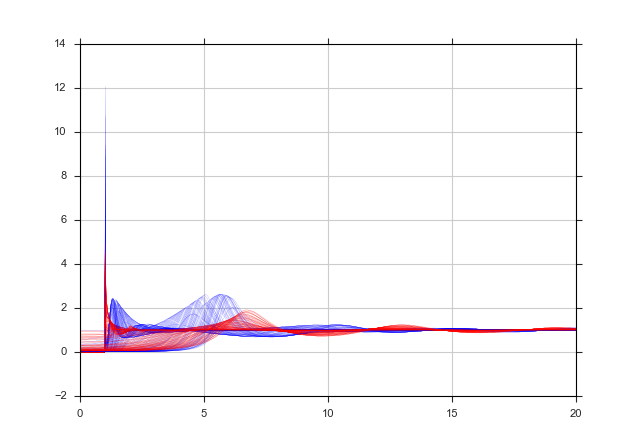

In [5]:
for nacl, sio2 in it.product(raw_data.coords['NaCl'], raw_data.coords['SiO2']):
    g_r_low = raw_data.sel(epsilon=0.5, SiO2=sio2, NaCl=nacl, data='g_r', mn='100-50')
    g_r_high = raw_data.sel(epsilon=7, SiO2=sio2, NaCl=nacl, data='g_r', mn='100-50')
    lab = 'nacl {:.2f}, sio2 {:.2f}'.format(nacl.item(), sio2.item())
    plt.plot(r, g_r_low, marker=None, color='r', lw='0.1', label=lab)
    plt.plot(r, g_r_high, marker=None, color='b', lw='0.1', label=lab)
    plt.xlim(0, 4)
#     plt.legend()

<IPython.core.display.Javascript object>


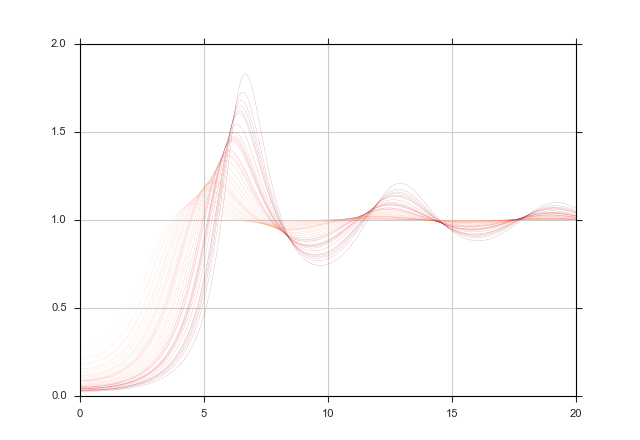

In [14]:

sio2s = [x.item() for x in raw_data.coords['SiO2']]
high_c = dict(zip(sio2s, sns.color_palette('Blues', n_colors=len(sio2s))))
low_c = dict(zip(sio2s, sns.color_palette('Reds', n_colors=len(sio2s))))
# for nacl, sio2 in it.product(raw_data.coords['NaCl'], raw_data.coords['SiO2']):
for sio2 in raw_data.coords['SiO2']:
    s_k_low = raw_data.sel(epsilon=0.5, SiO2=sio2, NaCl=0.5, data='S_k', mn='100-50')
    s_k_high = raw_data.sel(epsilon=7, SiO2=sio2, NaCl=nacl, data='S_k', mn='100-50')
    lab = 'nacl {:.2f}, sio2 {:.2f}'.format(nacl.item(), sio2.item())
    plt.plot(k, s_k_low, marker=None,lw='0.1', label=lab, color=low_c[sio2.item()])
    plt.plot(k, s_k_high, marker=None, lw='0.1', label=lab, color=high_c[sio2.item()])
    plt.xlim(0, 20)
#     plt.legend()